In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

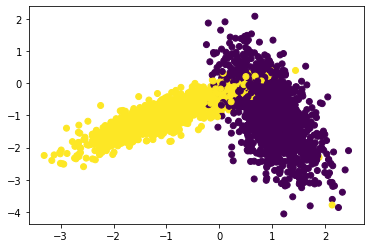

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()

p = random.sample(range(1,50),10) ## randomly sampled between range (1,50)
params = sorted(p)
print(len(params))

10


In [26]:
def RandomSearchCV(x_train,y_train,classifier,folds):    
    trainscores = []
    testscores  = [] 
    
    for k in tqdm(params):
        trainscores_folds = []
        testscores_folds  = [] 
        for i in range(0, folds):
            divided_data=int(len(x_train)/(folds))#dividing the data according to the fold value
            test_indices=list(set(list(range((divided_data*i), (divided_data*(i+1))))))#defining test Indices        
            train_indices = list(set(list(range(0, len(x_train)))) - set(test_indices))#defining train Indices          
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]
            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)#fitting the model
            Y_predicted = classifier.predict(X_test) #prediction
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))
            Y_predicted = classifier.predict(X_train) #prediction         
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted)) 
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    return trainscores,testscores



100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


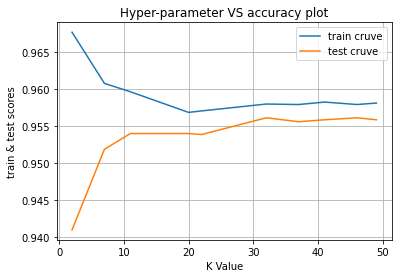

In [27]:
folds = 3
a,b = RandomSearchCV(X_train,y_train,neigh,folds)
plt.plot(params,a, label='train cruve')
plt.plot(params,b, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.grid()
plt.xlabel('K Value')
plt.ylabel('train & test scores')
plt.show()

In [28]:

def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

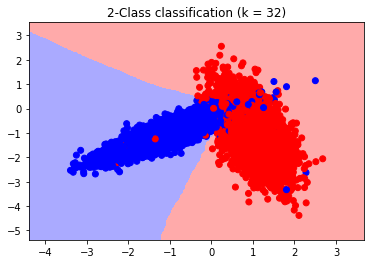

In [29]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 32) # K value = 32 
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)